In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [30]:
train = pd.read_csv("/Users/khevnaparikh/Desktop/Finance/Probability-of-Default-/train.csv")

In [3]:
train["cf_to_debt"] = train.cf_operations / (train.debt_st + train.debt_lt)
train["debt_ratio"] = (train.debt_st + train.debt_lt) / train.asst_tot
train['ebitda_ta'] = train.ebitda / train.asst_tot
train['fin_lev'] = train.roa - train.roe
train['wc_ta'] = train.wc_net / train.asst_tot

In [48]:
train[train.id == 1027660172].sort_values(by='fs_year')

,Unnamed: 0,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,...,roa,roe,wc_net,margin_fin,cf_operations,cf_to_debt,debt_ratio,ebitda_ta,fin_lev,wc_ta
179881,431813,1027660172,2008-12-31,17.0,SRU,68.0,NaT,2008,0.0,10633750.0,...,-0.01,-0.01,4314.0,4314.0,-797.0,797.00000,-9.400208e-08,-0.000071,0.0,0.000406
179882,431814,1027660172,2009-12-31,17.0,SRU,68.0,NaT,2009,0.0,10633750.0,...,-0.01,-0.01,3782.0,3782.0,-533.0,533.00000,-9.400678e-08,-0.000050,0.0,0.000356
179884,431816,1027660172,2010-12-31,17.0,SRU,68.0,NaT,2010,0.0,10633750.0,...,-0.01,-0.01,2910.0,2910.0,-871.0,-inf,0.000000e+00,-0.000082,0.0,0.000274
179883,431815,1027660172,2011-12-31,17.0,SRU,68.0,NaT,2011,0.0,10633750.0,...,0.00,0.00,2490.0,2491.0,-420.0,-inf,0.000000e+00,-0.000039,0.0,0.000234
179885,431817,1027660172,2012-12-31,17.0,SRU,68.0,NaT,2012,0.0,10633750.0,...,0.00,0.00,2046.0,2046.0,-444.0,-1.02069,4.089795e-05,-0.000042,0.0,0.000192


In [4]:
print("Size of Dataset:", train.shape)
print("Features:\n", list(train.columns))

Size of Dataset: (1023552, 49)
Features:
 ['Unnamed: 0', 'id', 'stmt_date', 'HQ_city', 'legal_struct', 'ateco_sector', 'def_date', 'fs_year', 'asst_intang_fixed', 'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'AR', 'cash_and_equiv', 'asst_tot', 'eqty_tot', 'eqty_corp_family_tot', 'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st', 'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating', 'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing', 'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec', 'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations', 'cf_to_debt', 'debt_ratio', 'ebitda_ta', 'fin_lev', 'wc_ta']


In [32]:
train.eqty_corp_family_tot.unique()

array([nan])

In [31]:
print('\n Unique default dates: ', train.def_date.unique(), '\n Unique fiscal years: ', train.fs_year.unique(), 
      '\n Unique statement dates: ', train.stmt_date.unique())


 Unique default dates:  ['NaT' '31/10/2008' '28/07/2008' ... '27/07/2013' '01/11/2013'
 '03/01/2013'] 
 Unique fiscal years:  [2011 2008 2009 2012 2007 2010] 
 Unique statement dates:  ['2011-12-31' '2008-12-31' '2009-12-31' '2012-12-31' '2007-12-31'
 '2010-12-31']


In [33]:
#pandas indexes the dataframe, so we can remove the Unanmed column as well as the equity corp column as its all nans 
#remove statement dates, keep fiscal years because they provide the same information 

train = train.drop(columns = ['Unnamed: 0', 'eqty_corp_family_tot'])
train = train.sort_values(["id", "fs_year", 'stmt_date'])
print("After removing the unnamed, eqty_corp_family_tot, stmt_date columns, the shape of training data is:", train.shape)
train.head()

After removing the unnamed, eqty_corp_family_tot, stmt_date columns, the shape of training data is: (1023552, 42)


,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
4,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,620.0,...,820.0,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0
1,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,860.0,...,-678.0,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0
2,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,860.0,...,4224.0,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0
5,520288,2010-12-31,28.0,SRL,14.0,NaT,2010,130973.0,1136731.0,946.0,...,-2529.0,-82781.0,-83593.0,NaN,3973.0,-4.08,-22.52,398756.0,-897381.0,-2104.0
0,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,1908.0,...,-309.0,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0


In [34]:
tmp = pd.concat([train.id, train.legal_struct, train.ateco_sector, train.HQ_city], axis = 1).drop_duplicates()

In [35]:
tmp

,id,legal_struct,ateco_sector,HQ_city
4,520288,SRL,14.0,28.0
8,1400357,SRL,49.0,35.0
14,1650282,SRL,25.0,27.0
997117,1900034,SRL,68.0,3.0
16,1930130,SRL,43.0,13.0
...,...,...,...,...
957933,98002050783,SRL,41.0,78.0
957941,98002670176,SRL,36.0,17.0
957944,98111210179,SRL,69.0,17.0
957951,98111220178,SRL,70.0,17.0


<b> Legal structure of the firms:

In Italy, there are two main types of limited liability companies:
- 'SRL': Private Limited Companies by Quotas (limited liability)
- 'SPA': Public Limited Companies by Shares (Joint-Stock Companies)

- 'SRU': 
- 'SAU': Single Shareholder Corporation 
- 'SAA': Public Firms 
- 'SRS':

In [11]:
print('Image 1:')
print("Distribution of \n Legal Structure of Firms")
tmp.legal_struct.value_counts(normalize=True)

Image 1:
Distribution of 
 Legal Structure of Firms


SRL    0.733879
SRU    0.163631
SPA    0.082251
SAU    0.020020
SAA    0.000202
SRS    0.000017
Name: legal_struct, dtype: float64

<b> Industry sector code:

In [12]:
print("Distribution of Industry sectors")
tmp.ateco_sector.value_counts(normalize=True).head(10)

Distribution of Industry sectors


68.0    0.191304
41.0    0.149690
46.0    0.112679
25.0    0.043519
47.0    0.042144
43.0    0.031993
28.0    0.029633
45.0    0.023188
70.0    0.022822
55.0    0.020298
Name: ateco_sector, dtype: float64

<b> City of main branch:

In [13]:
print("Distribution of city of main branch")
tmp.HQ_city.value_counts(normalize=True).head(10)

Distribution of city of main branch


15.0    0.115930
58.0    0.091930
63.0    0.035341
17.0    0.034205
1.0     0.033717
16.0    0.029530
37.0    0.024071
24.0    0.023411
26.0    0.021563
48.0    0.020962
Name: HQ_city, dtype: float64

<b> Taxes and Extraordinary Income:

In [14]:
avg_taxes = train.groupby(['id'])['taxes'].mean().to_frame()
avg_ext_inc = train.groupby(['id'])['inc_extraord'].mean().to_frame()

taxes = pd.concat([avg_taxes, avg_ext_inc], axis = 1).reset_index()

print('% of unique firms with no tax liability:', np.round((len(taxes[taxes.taxes <= 0]) / taxes.id.nunique()),4)*100)
print('% of unique firms with tax liability:', np.round((len(taxes[taxes.taxes > 0]) / taxes.id.nunique()),4)*100)

% of unique firms with no tax liability: 31.31
% of unique firms with tax liability: 68.69


In [15]:
no_taxliab_ids = list(taxes[taxes.taxes <= 0]['id'])
tmp2 = train[train.id.isin(no_taxliab_ids)]
tmp3 = pd.concat([tmp2.id, tmp2.legal_struct], axis =1).drop_duplicates()
print("Distribution of Legal Structure of Firms for those with no tax liability")
tmp3.legal_struct.value_counts(normalize=True)

Distribution of Legal Structure of Firms for those with no tax liability


SRL    0.705229
SRU    0.198866
SPA    0.074109
SAU    0.021621
SAA    0.000161
SRS    0.000013
Name: legal_struct, dtype: float64

In [16]:
taxliab_ids = list(taxes[taxes.taxes > 0]['id'])
tmp4 = train[train.id.isin(taxliab_ids)]
tmp5 = pd.concat([tmp4.id, tmp4.legal_struct], axis =1).drop_duplicates()
print("Distribution of Legal Structure of Firms for those with tax liability")
tmp5.legal_struct.value_counts(normalize=True)

Distribution of Legal Structure of Firms for those with tax liability


SRL    0.746935
SRU    0.147574
SPA    0.085962
SAU    0.019290
SAA    0.000220
SRS    0.000018
Name: legal_struct, dtype: float64

<b> Default vs. Non-Defaulted firms:


In [12]:
percent_default = np.round(((len(train[train['def_date'] != 'NaT']) / len(train)) * 100),2)

print("% Nondefault in dataset:", 100 - percent_default)
print("% Default in dataset:",  percent_default)

% Nondefault in dataset: 94.59
% Default in dataset: 5.41


In [36]:
defaulted = train[train['def_date'] != 'NaT']
nondefaulted = train[train['def_date'] == 'NaT']

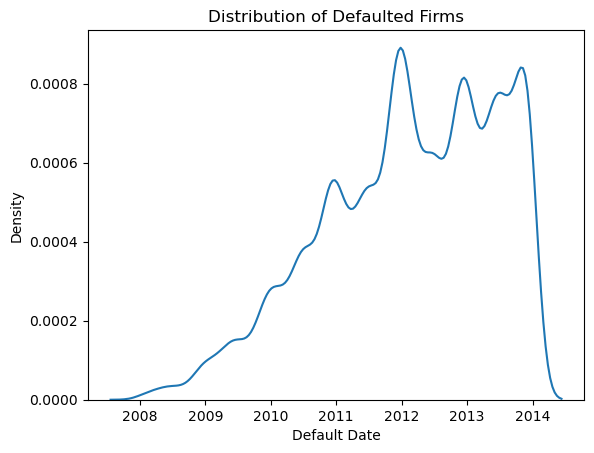

In [11]:
sns.kdeplot(data=defaulted, x=pd.to_datetime(defaulted['def_date'],  infer_datetime_format=True))
plt.title("Distribution of Defaulted Firms")
plt.xlabel("Default Date")
plt.show()

# sns.displot(defaulted['def_date'])

<b> Default HQ City vs. Non-Defaulted HQ City:

In [37]:
defaulted.columns

Index(['id', 'stmt_date', 'HQ_city', 'legal_struct', 'ateco_sector',
       'def_date', 'fs_year', 'asst_intang_fixed', 'asst_tang_fixed',
       'asst_fixed_fin', 'asst_current', 'AR', 'cash_and_equiv', 'asst_tot',
       'eqty_tot', 'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt',
       'debt_fin_st', 'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt',
       'rev_operating', 'COGS', 'prof_operations', 'goodwill', 'inc_financing',
       'exp_financing', 'prof_financing', 'inc_extraord', 'taxes', 'profit',
       'days_rec', 'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin',
       'cf_operations'],
      dtype='object')

In [59]:
tmp6 = pd.concat([defaulted.id, defaulted.ateco_sector], axis =1).drop_duplicates()
tmp7 = pd.concat([nondefaulted.id, nondefaulted.ateco_sector], axis =1).drop_duplicates()

top_def_city = tmp6.ateco_sector.value_counts(normalize=True).head(6)
top_nondef_city = tmp7.ateco_sector.value_counts(normalize=True).head()

In [60]:
print("Image 2")
print("% of Default vs. Non-Default firms \n that come from top 5 HQ City:")
pd.concat([top_def_city, top_nondef_city], names = 'Top Industries', axis = 1, keys = ['Defaulted Firms', 'Non-defaulted Firms'])

Image 2
% of Default vs. Non-Default firms 
 that come from top 5 HQ City:


Top Industries,Defaulted Firms,Non-defaulted Firms
41.0,0.170164,0.147847
68.0,0.136651,0.196224
46.0,0.127839,0.111314
47.0,0.050372,0.041403
25.0,0.040389,0.043801
43.0,0.035092,NaN


<b> Financial Statement Features:

In [22]:
train.iloc[: , 6:].describe()[1:]

,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,asst_current,AR,cash_and_equiv,asst_tot,eqty_tot,liab_lt,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
mean,2009.636356,4.684047e+05,3.411074e+06,1.171699e+06,5.957970e+06,3.360637e+06,4.751146e+05,1.111351e+07,3.585192e+06,3.385748e+05,...,2.715674e+04,2.218713e+05,8.234940e+04,84.886815,6.070971e+05,2.914601,4.060562,1.133337e+06,-1.381130e+06,4.041489e+05
std,1.686576,1.486886e+07,1.293634e+08,2.875413e+07,5.419817e+07,3.994736e+07,9.391475e+06,1.799274e+08,8.996885e+07,4.606932e+07,...,3.322200e+06,1.092509e+07,8.867946e+06,167.310720,1.507074e+07,10.233800,28.870051,2.009072e+07,6.858357e+07,1.202904e+07
min,2007.000000,-3.442959e+06,-1.711468e+06,-2.490262e+06,0.000000e+00,-2.782518e+06,-2.584593e+07,1.500000e+06,-8.052920e+08,-1.283245e+06,...,-9.724415e+08,-1.953236e+09,-1.914960e+09,-499.410000,-5.435868e+09,-963.900000,-150.000000,-4.130538e+09,-3.204300e+10,-1.914280e+09
25%,2008.000000,2.620000e+02,6.663100e+04,0.000000e+00,1.072830e+06,2.340728e+05,6.223000e+03,2.170073e+06,1.673525e+05,0.000000e+00,...,-3.990000e+02,-1.075900e+04,-2.165000e+04,-3.720000,4.004000e+04,0.110000,-1.500000,-1.009900e+05,-1.118978e+06,4.902000e+03
50%,2010.000000,7.975000e+03,5.958990e+05,1.378000e+03,2.040524e+06,8.916955e+05,4.964700e+04,3.458428e+06,7.189230e+05,0.000000e+00,...,0.000000e+00,4.058400e+04,1.088800e+04,66.420000,1.504030e+05,2.390000,2.560000,3.669130e+05,-1.019600e+05,7.604500e+04
75%,2011.000000,7.515675e+04,2.064874e+06,7.188100e+04,4.135408e+06,2.092540e+06,2.628755e+05,6.975953e+06,2.059212e+06,2.082000e+04,...,3.855000e+03,1.680972e+05,8.528850e+04,158.490000,3.813440e+05,5.200000,13.150000,1.374780e+06,3.470322e+05,2.393900e+05
max,2012.000000,3.708467e+09,5.822144e+10,8.529187e+09,1.479057e+10,1.101077e+10,5.519622e+09,7.164463e+10,3.356488e+10,2.707827e+10,...,1.849907e+09,3.142607e+09,2.314332e+09,2295.840000,4.227442e+09,907.560000,149.990000,3.768695e+09,1.830129e+09,3.377050e+09


<b> Calcuate Ratios: </b>

Leverage: total debt/total equity or total debt/total assets  
Altman's Approach: 
- Working Capital / Total Assets 
- EBIT/Total Assets  

Beaver's Approach
- Cash Flow/Total Debt 

In [7]:
train.columns

Index(['id', 'stmt_date', 'HQ_city', 'legal_struct', 'ateco_sector',
       'def_date', 'fs_year', 'asst_intang_fixed', 'asst_tang_fixed',
       'asst_fixed_fin', 'asst_current', 'AR', 'cash_and_equiv', 'asst_tot',
       'eqty_tot', 'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt',
       'debt_fin_st', 'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt',
       'rev_operating', 'COGS', 'prof_operations', 'goodwill', 'inc_financing',
       'exp_financing', 'prof_financing', 'inc_extraord', 'taxes', 'profit',
       'days_rec', 'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin',
       'cf_operations'],
      dtype='object')

In [8]:
np.isinf(train["cf_operations"]).sum()

0

In [32]:
train["cf_to_debt"] = train.cf_operations / (train.debt_st + train.debt_lt)
train["debt_ratio"] = (train.debt_st + train.debt_lt) / train.asst_tot
train['ebitda_ta'] = train.ebitda / train.asst_tot
train['fin_lev'] = train.roa - train.roe
train['wc_ta'] = train.wc_net / train.asst_tot

In [33]:
train.iloc[: , -5:].describe()[1:].corr()

,cf_to_debt,debt_ratio,ebitda_ta,fin_lev,wc_ta
cf_to_debt,1.000000,0.946322,0.991825,0.915504,0.998765
debt_ratio,0.946322,1.000000,0.183675,0.920339,0.263785
ebitda_ta,0.991825,0.183675,1.000000,0.552695,0.996607
fin_lev,0.915504,0.920339,0.552695,1.000000,0.619323
wc_ta,0.998765,0.263785,0.996607,0.619323,1.000000


In [25]:
train.head()
# train["leverage_1"] = 1 - train.eqty_tot / train.asst_tot
# tmp = train[~train["cf_to_debt"].isin([np.nan, np.inf, -np.inf])]

<b> Multicollinearity: 

In [27]:
import warnings
warnings.filterwarnings("ignore")

corr_coeffs = train.corr(method='pearson')
corr_coeffs = corr_coeffs.mask(np.tril(np.ones(corr_coeffs.shape)).astype(np.bool))

corr_coeffs = corr_coeffs[abs(corr_coeffs) >= 0.9].stack().reset_index().rename(columns={0:'correlation'}).sort_values(by='correlation', ascending=False)
corr_coeffs

,level_0,level_1,correlation
5,rev_operating,COGS,0.996275
7,taxes,profit,0.968024
1,asst_tang_fixed,eqty_tot,0.933470
3,asst_current,debt_st,0.933309
0,asst_tang_fixed,asst_tot,0.932832
2,asst_current,AR,0.932226
4,asst_tot,eqty_tot,0.929916
6,prof_operations,ebitda,0.928359
8,roa,ebit_ta,0.920224


In [58]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[['rev_operating', 'COGS', 'profit', 'taxes', 'asst_tang_fixed', 'eqty_tot', 'asst_current', 'debt_st']]
X = X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]
# X = train.iloc[: , 7:][~train.iloc[: , 7:].isin([np.nan, np.inf, -np.inf]).any(1)]

# # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)  
# print(vif_data[vif_data.VIF > 5])

           feature         VIF
0    rev_operating  298.013336
1             COGS  289.823014
2           profit   18.800414
3            taxes   22.836126
4  asst_tang_fixed    8.601756
5         eqty_tot    9.442013
6     asst_current    9.339670
7          debt_st    8.862069


#### Fiscal Years:

In [29]:
train['default_year'] = [date.year for date in pd.to_datetime(train['def_date'], format = "%d/%m/%Y")]
train['y_it'] = np.logical_and(train.default_year.notna(), train['fs_year'] + 1 >= train.default_year).astype(int)

In [30]:
train.y_it.value_counts()

0    1012008
1      11544
Name: y_it, dtype: int64

#### String Variables: 
- HQ_city
- legal_struct	
- ateco_sector

<b> Transformations: 

In [ ]:
# def walk_forward_harness(df, start, num_features, step_size=1):
# #             preprocessor, estimator, predictor,  date_col = 'Date', step_size = 1):     
#     '''
#     input: 
#         start: a date index value after which to start the walk-forward test
#         date_col: the column index of the column in df that holds the date information for each row
#         step_siz: the number of time units to move forward in each walk-forward step.
        
#     output: 
#         predictions:a vector of predictions of the same length as the number of rows in new_df. 
#         model_list: a list of models, one for each walk-forward step, of length equal to the number of walk-forward steps 
#         stats_list: a list of statistics (possibly a list of lists or tupples), with one entry for each walk-forward step,
#                     of length equal to the number of walk-forward step
#     '''
    
#     #step 6: Repeat steps 1 through 5, adding the new predictions to the result set for every year

#     #start is some year 
#     fs_year = df.index.map(lambda shape: shape[0])
#     years = np.unique(fs_year)
#     print(years)
#     idx = int(np.where(years == start)[0])
    
#     model_list = []
#     results = {'actual': [], 'preds': []}  
    
#     for step in range(0, len(years[idx:])):
#         if start == years[-1]:
#             break
#         print("Iteration:", step)
#         print("")
#         start_time = time.time()

#         #step 1: separate data between train, test and preprocess 
#         df['in_train'] = ['train' if row <= start else 'test' if row == start+1 else 'no_use'  
#                             for row in fs_year]
        
#         X_train = df.loc[df['in_train'] == 'train'].iloc[:,:num_features]
#         y_train = df.loc[df['in_train'] == 'train'].iloc[:,num_features]
        
#         X_test = df.loc[df['in_train'] == 'test'].iloc[:,:num_features]
#         y_test = list(df.loc[df['in_train'] == 'test'].iloc[:,num_features])
#         results['actual'].append(y_test)
        
#         #step 2: Train and fit the model using all the data available on or before the selected year.
#         model = LogisticRegression().fit(X_train, y_train)
#         model_list.append(model)
     
#         #step 3: generate the model outputs for all the firms available during the following year (in this example 1998)
#         #step 4: Save the prediction as part of a result set.
#         y_preds = model.predict_proba(X_test)
#         results['preds'].append(list(y_preds))
    
#         #step 5. Now move the window up (e.g., to 1998) so that all the data through
#         start += step_size 
#         print("--- %s seconds ---" % (time.time() - start_time))
    
#     actuals  = [item for sublist in results['actual'] for item in sublist]
#     predictions  = [item for sublist in results['preds'] for item in sublist]
 
#     return actuals, predictions, model_list